In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## **Performing EDA**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/COSC_757_Project/NYPD_Calls_Cleaned_Data.csv')

In [ ]:
data.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude,Cluster,Cluster_Label,RESPONSE_TS,INCIDENT_HOUR
0,91250176,2023-01-01,2022-12-31,23:24:39,67.0,2,vehicle accident injury,1,2023-01-01 01:08:21,2023-01-01 01:09:57,2023-01-01 01:09:57,2023-01-01 01:57:44,40.649730,-73.936475,8,Directed Patrols and Inspections,0.000098,23
1,91250180,2023-01-01,2022-12-31,23:24:47,75.0,2,alarms commercialburglary,1,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,40.662817,-73.881221,6,Burglary Alarms,0.000402,23
2,91250681,2023-01-01,2022-12-31,23:55:56,114.0,4,alarms residentialburglary,1,2023-01-01 00:01:26,2023-01-01 00:06:18,2023-01-01 00:06:18,2023-01-01 00:06:27,40.762587,-73.912199,6,Burglary Alarms,0.000299,23
3,91250683,2023-01-01,2022-12-31,23:55:59,66.0,2,alarms residentialburglary,1,2023-01-01 00:01:34,2023-01-01 00:37:14,2023-01-01 01:09:32,2023-01-01 01:21:14,40.610729,-73.967644,6,Burglary Alarms,0.004174,23
4,91250700,2023-01-01,2022-12-31,23:57:08,115.0,4,alarms commercialburglary,1,2023-01-01 00:01:29,2023-01-01 00:14:28,2023-01-01 00:21:59,2023-01-01 01:24:22,40.748119,-73.891679,6,Burglary Alarms,0.001259,23


In [ ]:
import matplotlib.pyplot as plt
data.drop('CAD_EVNT_ID', axis=1).describe()[1:].T.style.background_gradient(cmap='crest', axis=1).format("{:.3f}")

,mean,std,min,25%,50%,75%,max
NYPD_PCT_CD,60.632,34.817,0.000,32.000,61.000,88.000,123.000
BORO_NM,2.571,1.107,0.000,2.000,3.000,3.000,5.000
CIP_JOBS,1.070,0.372,0.000,1.000,1.000,1.000,3.000
Latitude,40.736,0.081,40.499,40.676,40.735,40.808,40.914
Longitude,-73.930,0.073,-74.255,-73.979,-73.937,-73.890,-73.700
Cluster,3.910,2.689,0.000,1.000,4.000,6.000,9.000
RESPONSE_TS,0.001,0.003,0.000,0.000,0.000,0.001,1.000
INCIDENT_HOUR,12.542,6.696,0.000,8.000,13.000,18.000,23.000


### 1. Response Time Analysis
Analyze the distribution, trends, and influencing factors of emergency response times.

In [ ]:
# Display summary statistics
print(data['RESPONSE_TS'].describe())

# Check skewness and kurtosis
print('Skewness:', data['RESPONSE_TS'].skew())
print('Kurtosis:', data['RESPONSE_TS'].kurtosis())

count    7.050040e+06
mean     1.231411e-03
std      3.402319e-03
min      0.000000e+00
25%      0.000000e+00
50%      2.149358e-05
75%      7.786818e-04
max      1.000000e+00
Name: RESPONSE_TS, dtype: float64
Skewness: 9.103059040548409
Kurtosis: 1099.4432795491466


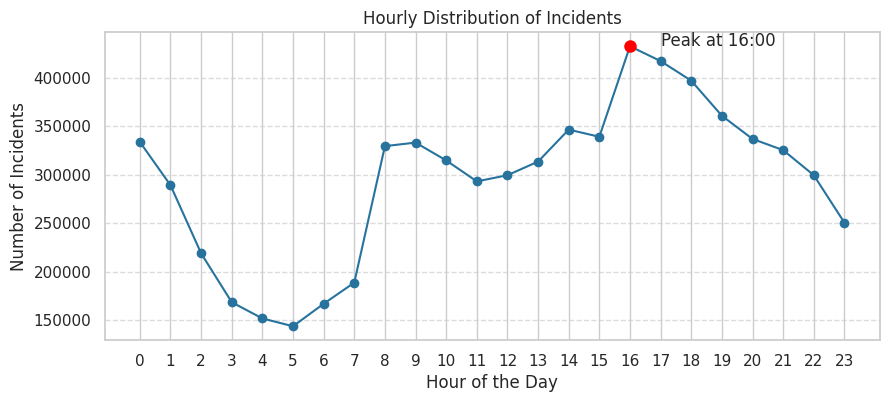

In [ ]:
# Count the frequency of incidents by hour
hourly_incidents = data['INCIDENT_HOUR'].value_counts().sort_index()

#Line plot for incidents by hour
plt.figure(figsize=(10, 4))
hourly_incidents.plot(kind='line', marker='o', color='#27739e')
plt.title('Hourly Distribution of Incidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))  # Ensure all hours are shown

peak_hour = hourly_incidents.idxmax()
plt.plot(peak_hour, hourly_incidents.max(), marker='o', color='red', markersize=8)
plt.annotate(f'Peak at {peak_hour}:00', xy=(peak_hour, hourly_incidents.max()), xytext=(peak_hour+1, hourly_incidents.max()))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-29-d0eff8b83010>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='INCIDENT_HOUR', y='RESPONSE_TS', data=response_by_hour_corrected, palette='crest')


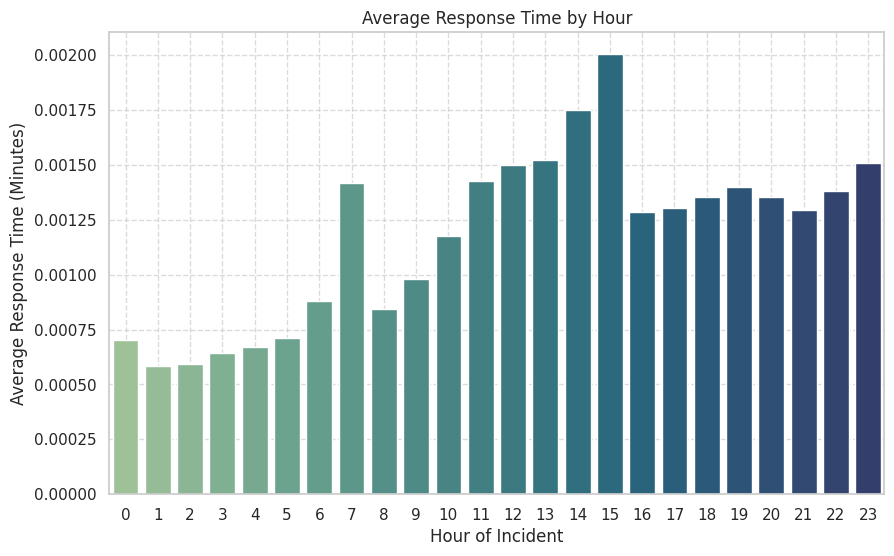

In [ ]:
# Group by 'INCIDENT_HOUR' and 'DAY_OF_WEEK' and calculate the mean response time
response_by_hour_corrected = data.groupby('INCIDENT_HOUR')['RESPONSE_TS'].mean().reset_index()

# Visualization for corrected response time trends
plt.figure(figsize=(10, 6))
sns.barplot(x='INCIDENT_HOUR', y='RESPONSE_TS', data=response_by_hour_corrected, palette='crest')
plt.title('Average Response Time by Hour')
plt.xlabel('Hour of Incident')
plt.ylabel('Average Response Time (Minutes)')
plt.grid(linestyle='--', alpha=0.7)

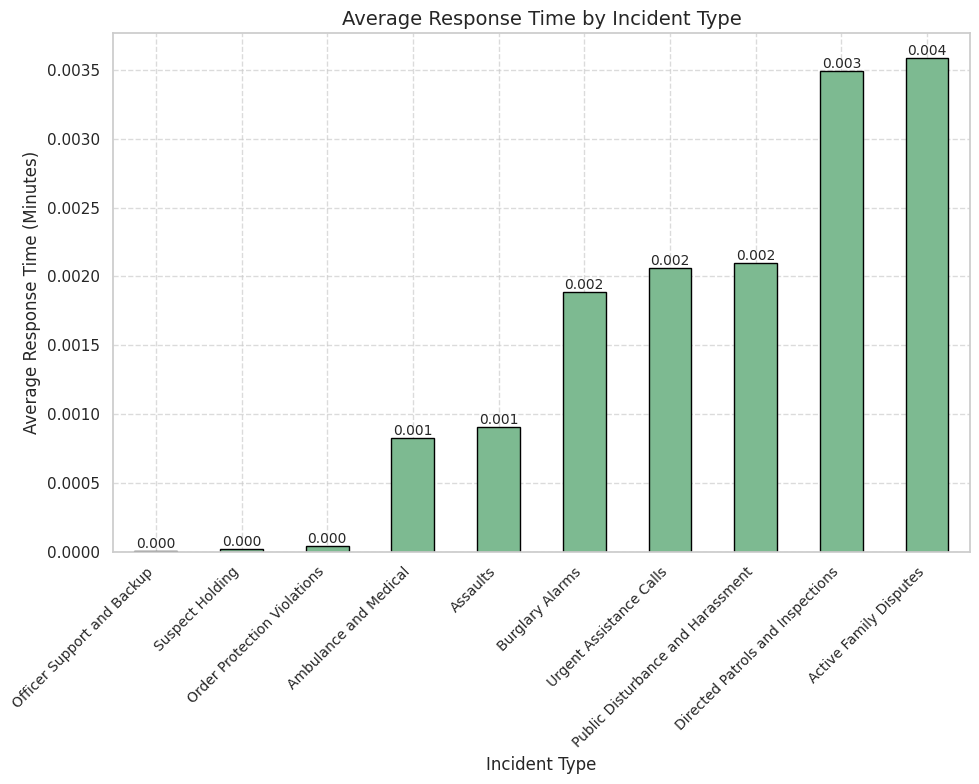

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style to "crest"
sns.set_theme(style="whitegrid", palette="crest")

# Assuming 'data' contains your DataFrame with 'Cluster_Label' and 'RESPONSE_TS'

# Group the data by 'Cluster_Label' and calculate average response times
average_response_times = data.groupby('Cluster_Label')['RESPONSE_TS'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 8))
average_response_times.plot(kind='bar', edgecolor='black')  # Vertical bar plot
plt.xlabel('Incident Type', fontsize=12)
plt.ylabel('Average Response Time (Minutes)', fontsize=12)
plt.title('Average Response Time by Incident Type', fontsize=14)

# Add value labels on top of each bar
for index, value in enumerate(average_response_times):
    plt.text(index, value, f'{value:.3f}', ha='center', va='bottom', fontsize=10)

plt.grid(linestyle='--', alpha=0.7)  # Add grid lines only on y-axis
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Call Volume Analysis

Analyze patterns in the frequency of emergency calls to aid in resource planning.


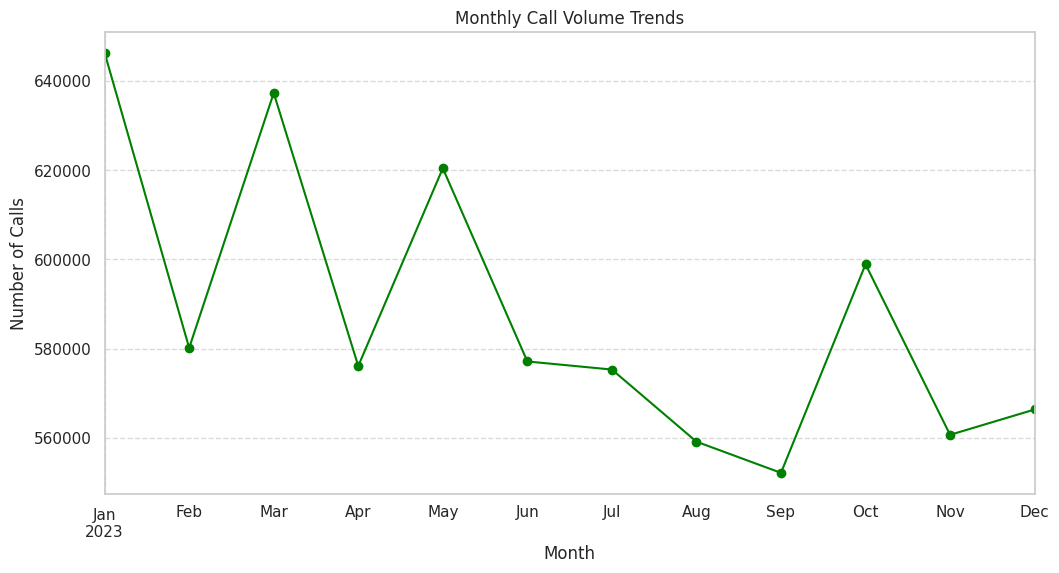

In [ ]:
# Convert 'CREATE_DATE' to datetime format to extract year and month
data['CREATE_DATE'] = pd.to_datetime(data['CREATE_DATE'])

# Group by year and month to calculate monthly call volumes
monthly_call_volumes = data.groupby(data['CREATE_DATE'].dt.to_period("M")).size()

# Convert the period index to datetime to plot
monthly_call_volumes.index = monthly_call_volumes.index.to_timestamp()

# Plotting the monthly call volumes
plt.figure(figsize=(12, 6))
monthly_call_volumes.plot(kind='line', marker='o', color='green')
plt.title('Monthly Call Volume Trends')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


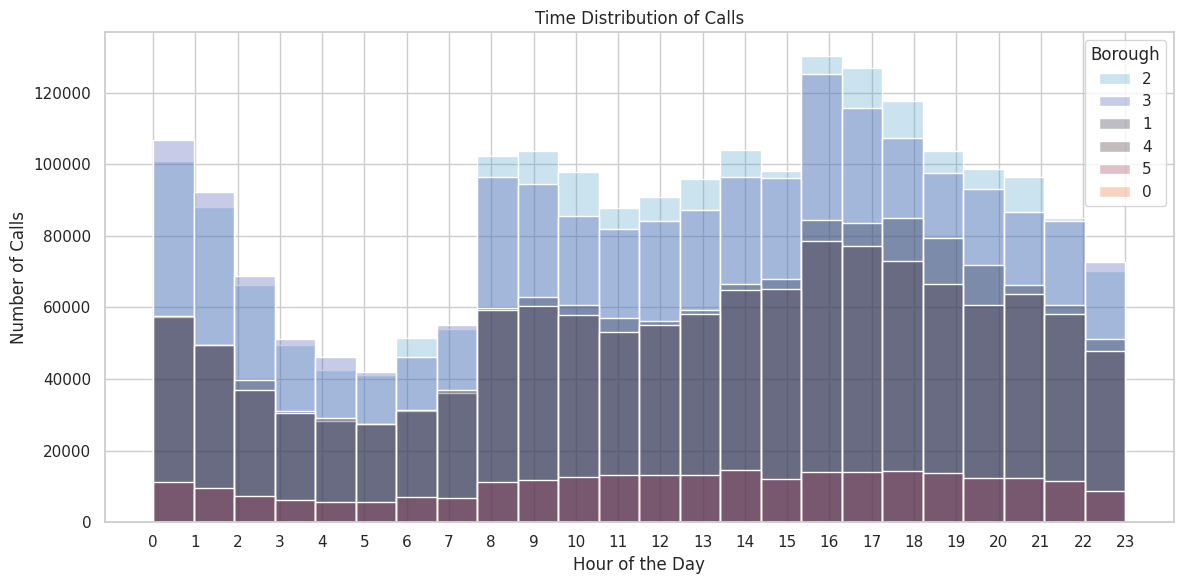

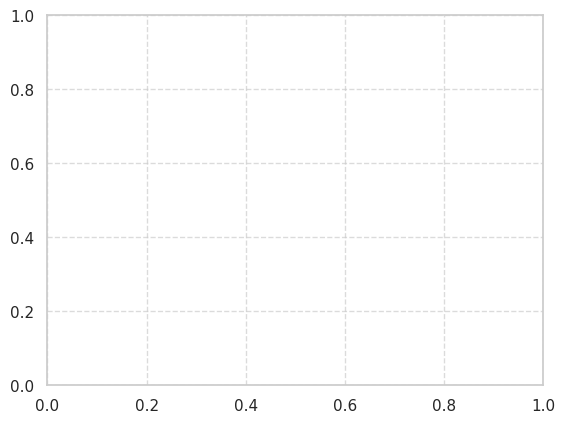

In [ ]:
# Since the data is already loaded as nypd_data and 'neighborhood' is analogous to 'BORO_NM' in our case
# which is already cleaned and converted to strings, we can skip the cleaning part

# Count the number of calls for each borough
borough_counts = data['BORO_NM'].value_counts()

# Select the top boroughs by call count (we will attempt to select top 10, but dataset may not allow)
top_boroughs = borough_counts.nlargest(10)  # This may return less than 10 if the dataset is small

# Plotting the histograms again with the 'icefire' colormap using seaborn
plt.figure(figsize=(12, 6))

# Now we use seaborn to add the 'icefire' palette
for idx, borough in enumerate(top_boroughs.index):
    calls_in_borough = data[data['BORO_NM'] == borough]
    sns.histplot(calls_in_borough['INCIDENT_HOUR'], bins=24, kde=False,
                 color=sns.color_palette("icefire", len(top_boroughs.index))[idx], label=borough, edgecolor=None, alpha=0.3)

plt.title('Time Distribution of Calls')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.legend(title='Borough')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()
plt.grid(linestyle='--', alpha=0.7)

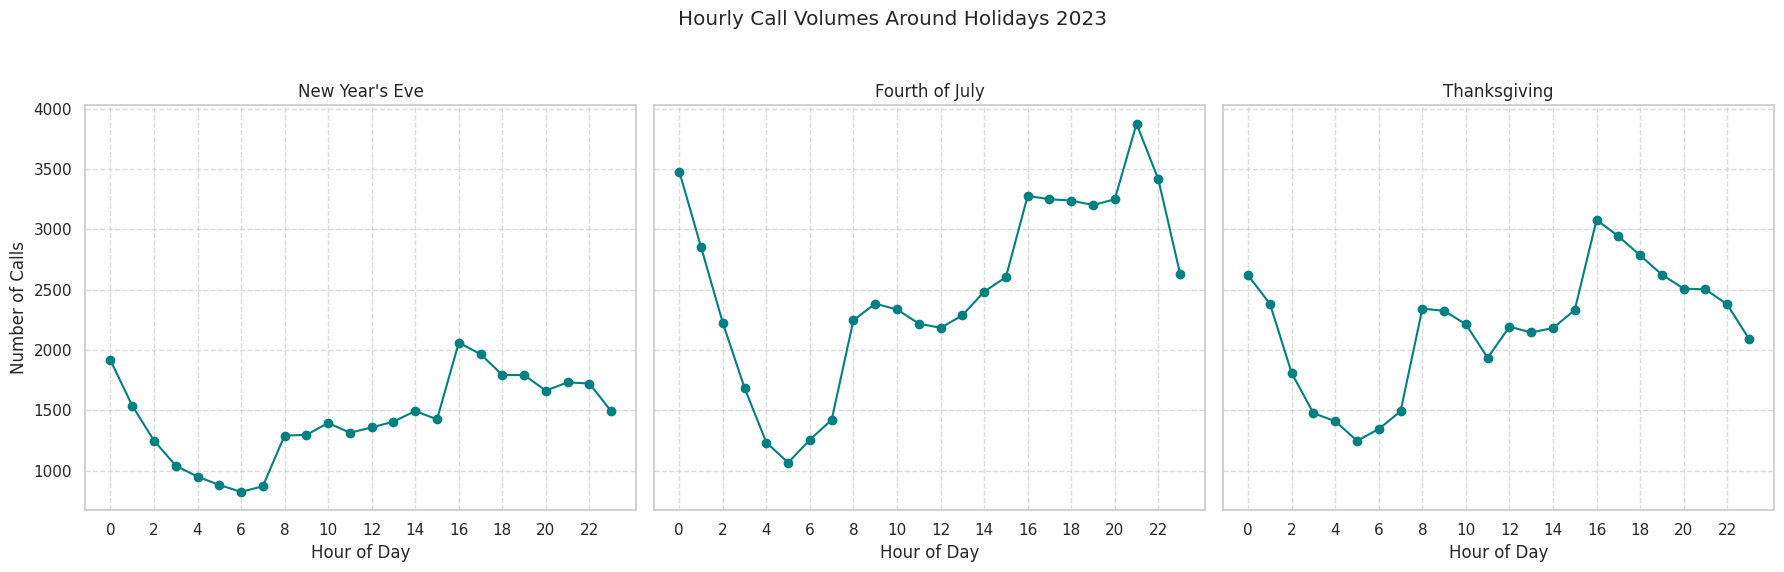

In [ ]:
# Adjust the function to plot line graphs side by side
def plot_hourly_calls_line_all_holidays(holidays):
    # Create a figure with subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    for i, (holiday, date) in enumerate(holidays.items()):
        # Filter data for the holiday and the surrounding days
        period = pd.date_range(start=date - pd.Timedelta(days=1), end=date + pd.Timedelta(days=1))
        filtered_data = data[data['CREATE_DATE'].isin(period)]

        # Group by hour and count calls, ensuring all hours are represented
        hourly_calls = filtered_data.groupby('INCIDENT_HOUR').size().reindex(range(0, 24), fill_value=0)

        # Plotting in the respective subplot
        axs[i].plot(hourly_calls.index, hourly_calls.values, marker='o', linestyle='-', color='teal')
        axs[i].set_title(f'{holiday}')
        axs[i].set_xlabel('Hour of Day')
        axs[i].set_xticks(range(0, 24, 2))
        axs[i].grid(linestyle='--', alpha=0.7)

    # Set common labels
    fig.suptitle('Hourly Call Volumes Around Holidays 2023')
    axs[0].set_ylabel('Number of Calls')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the common title
    plt.show()

# Plot hourly call volumes for all defined holidays using line plots
holidays = {
    'New Year\'s Eve': pd.to_datetime('2023-12-31'),
    'Fourth of July': pd.to_datetime('2023-07-04'),
    'Thanksgiving': pd.to_datetime('2023-11-24')
}

plot_hourly_calls_line_all_holidays(holidays)

**Types of Incidents**

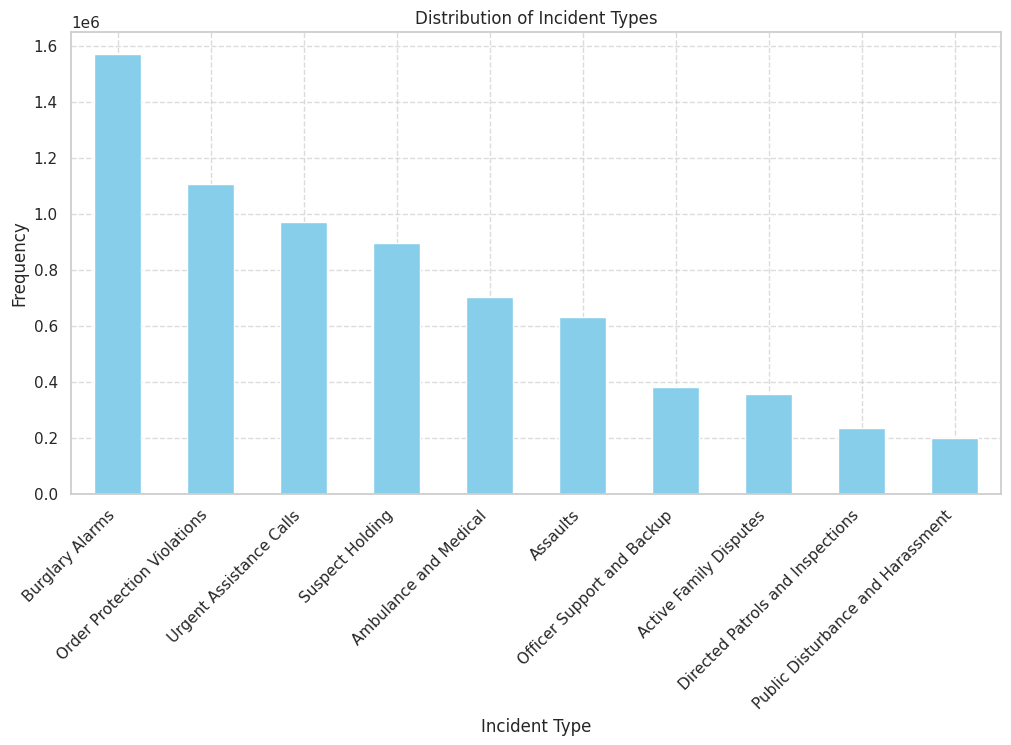

In [ ]:
import matplotlib.pyplot as plt

# Convert incident types to category for better plotting
data['Cluster_Label'] = data['Cluster_Label'].astype('category')

# Count the frequency of each type of incident
incident_distribution = data['Cluster_Label'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
incident_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Incident Types')
plt.xlabel('Incident Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


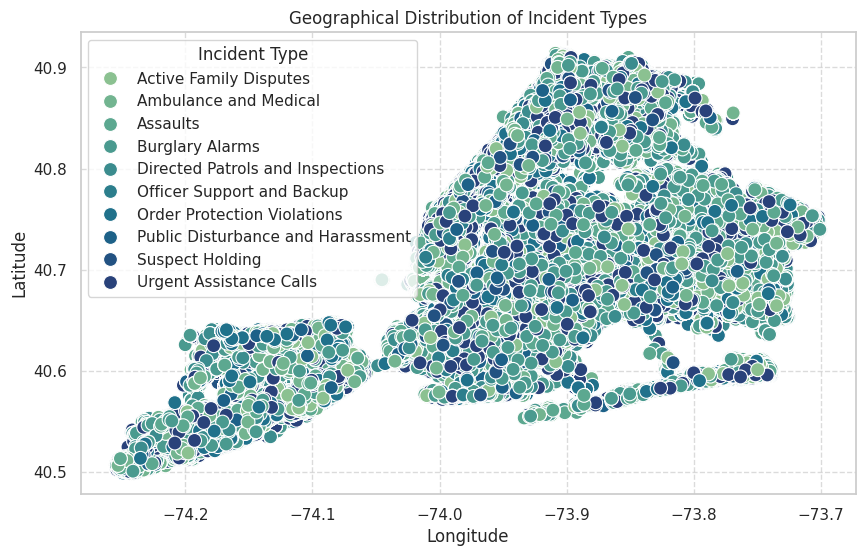

In [ ]:
import seaborn as sns

# Plotting incidents on a scatter plot with latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster_Label', data=data, s=100, palette='crest')
plt.title('Geographical Distribution of Incident Types')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Incident Type')
plt.grid(linestyle='--', alpha=0.7)
plt.show()